# **8-1. ReLU**

## **Problem of sigmoid**
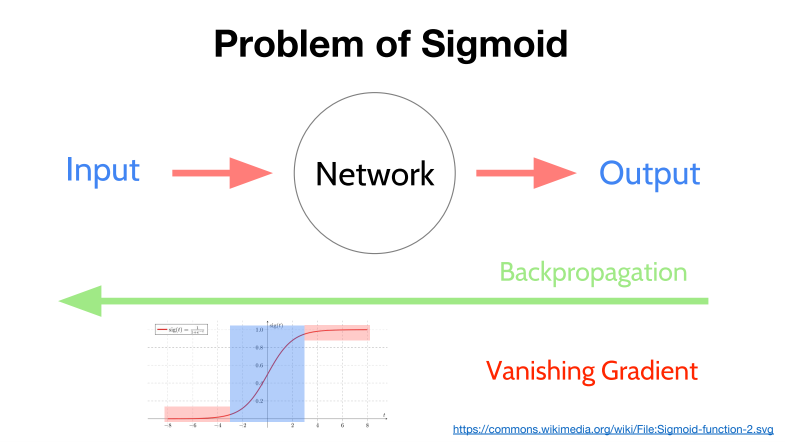

모델 학습 과정에서 활성화 함수로 시그모이드를 사용했을 경우, 정답과 예측값의 차이를 구해 이를 미분하고, 역전파를 하게 된다. 역전파시, **활성화 함수의 Gradient가 곱해지게 되는데**, 여기서 시그모이드 함수의 한계점이 드러난다.   

시그모이드 함수를 보면 가운데 파란색으로 칠해진 부분은 기울기가 그래도 잘 구해지는 구간인데, 빨간색으로 칠해진 구간은 기울기가 0이거나 0에 가까운 매우 작은 수가 된다.   

시그모이드 층이 하나가 아니라 여러개여서, 이런 작은 수들이 계속 곱해진다면? 기울기가 소멸되어버리는 마법!    
이걸 **Vanishing Gradient**라고 한다.    

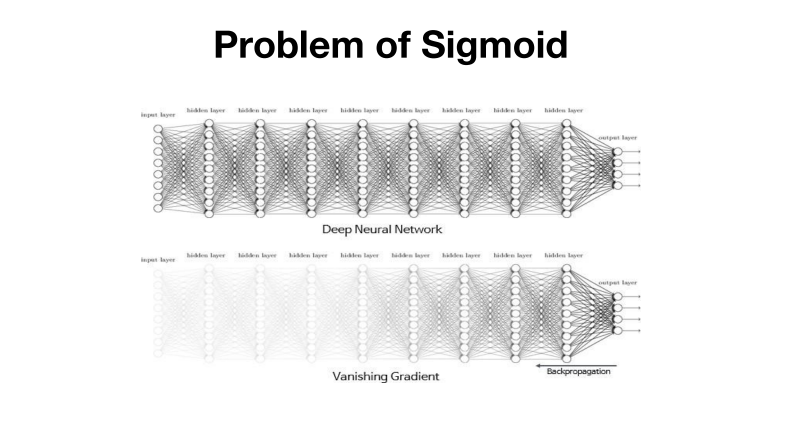

## **ReLU의 등장**
시그모이드 함수의 Vanishing Gradient 문제를 예방하기 위해, ReLU라는 활성화 함수가 등장하게 되었다. 간단한 형태의 함수로, input이 0보다 작은 음수면 0을, 음수가 아닌 값이면 input값을 반환하는 함수다.

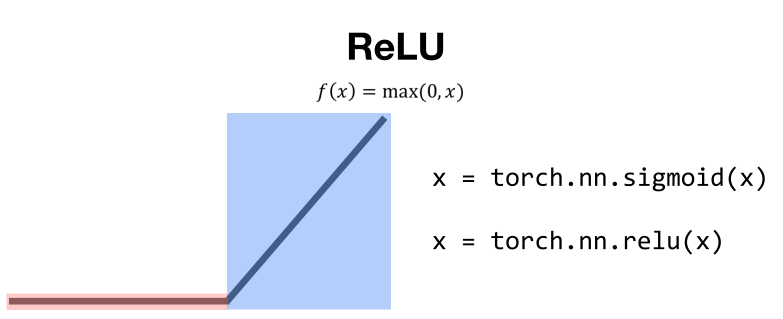

x가 양수이면 Gradient Vanishing 문제가 발생하지 않지만, 음수나 0이라면 0이 곱해져서 아예 기울기가 사라져버릴 위험이 있다.   
하지만 걱정 마세요! 잘 돌아갑니다    



## **Optimizer in PyTorch**
torch.optim 패키지는 잘 쓰이는 optimization Function들이 잘 구현되어있는 패키지이다. SGD, Adadelta, RMSprop등 많은 최적화 함수가 있는데, 이번 실습에서는 Adam을 사용해 본다!   

### Review: reading data

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
learning_rate = 0.001
batch_size = 100
training_epochs = 15

mnist_train = dsets.MNIST(root = './',
                          train = True,
                          transform = transforms.ToTensor(),
                          download = True)

mnist_test = dsets.MNIST(root = './',
                         train = False,
                         transform = transforms.ToTensor(),
                         download = True)

data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          drop_last = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 265322122.31it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 43573990.58it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 81228684.14it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5358798.53it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



### Code: mnist_softmax

In [4]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10)

#Initialization
torch.nn.init.normal_(linear.weight)

#define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(linear.parameters(), lr=learning_rate) #Optimizer로 Adam을 썼다!

### Train

In [5]:
total_batch = len(data_loader)
for epoch in range(1, training_epochs+1):
    avg_cost = 0

    for X, Y in data_loader:
        X = X.view(-1, 784).to(device)
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost/total_batch

    print("Epoch: ", "%04d"%(epoch), "cost = ", "{:.9f}".format(avg_cost))

Epoch:  0001 cost =  5.728238583
Epoch:  0002 cost =  1.562848210
Epoch:  0003 cost =  1.036820531
Epoch:  0004 cost =  0.828017235
Epoch:  0005 cost =  0.710269153
Epoch:  0006 cost =  0.633605897
Epoch:  0007 cost =  0.577520013
Epoch:  0008 cost =  0.535485506
Epoch:  0009 cost =  0.502551079
Epoch:  0010 cost =  0.476104438
Epoch:  0011 cost =  0.453757495
Epoch:  0012 cost =  0.435718417
Epoch:  0013 cost =  0.420195520
Epoch:  0014 cost =  0.406820863
Epoch:  0015 cost =  0.394985616


### Code: mnist_nn

In [7]:
# MNIST data image of shape 28 * 28 = 784
linear1 = torch.nn.Linear(784, 256)
linear2 = torch.nn.Linear(256, 256)
linear3 = torch.nn.Linear(256, 10)
relu = torch.nn.ReLU() #ReLU 등장!

torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

#define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(linear.parameters(), lr=learning_rate)

In [8]:
total_batch = len(data_loader)
for epoch in range(1, training_epochs+1):
    avg_cost = 0

    for X, Y in data_loader:
        X = X.view(-1, 784).to(device)
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost/total_batch

    print("Epoch: ", "%04d"%(epoch), "cost = ", "{:.9f}".format(avg_cost))

Epoch:  0001 cost =  2651.020751953
Epoch:  0002 cost =  2651.021240234
Epoch:  0003 cost =  2651.022949219
Epoch:  0004 cost =  2651.021240234
Epoch:  0005 cost =  2651.023437500
Epoch:  0006 cost =  2651.022216797
Epoch:  0007 cost =  2651.021972656
Epoch:  0008 cost =  2651.022216797
Epoch:  0009 cost =  2651.020751953
Epoch:  0010 cost =  2651.020263672
Epoch:  0011 cost =  2651.022216797
Epoch:  0012 cost =  2651.020751953
Epoch:  0013 cost =  2651.020996094
Epoch:  0014 cost =  2651.022705078
Epoch:  0015 cost =  2651.022705078
